# Getting Started
- Install Software Requirements for the labs
- Load and explore the dataset
- Plot the data
- Clean the data 
- Learn about feature engineering

# Installing Software Requirements 

Here is a list of what you'll need:
- Python3 [download](https://www.python.org/downloads/)
- Pandas for data manipulation
- Numpy for computations
- sklearn, tensorflow, keras framework for Machine Learning
- Matplotlib for plottin



In [56]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image
from sklearn import preprocessing, neighbors
print("Imported all required components")

Imported all required components


Once all the software requirements have been installed, you should see the message "Imported all required components" printed

**Loading the UCI Adultdataset**

In this tutorial, we will be interacting with the UCI Adult Dataset. We will be using in a local version of the dataset that we download from [here](https://archive.ics.uci.edu/ml/datasets/adult)

The dataset is currently stored into the "data/adult" local directory.


**Define dataset path in variables**

In [5]:
ADULT_DIRECTORY = os.path.join(os.getcwd(), 'data','adult')
ADULT_DATA_PATH = os.path.join(ADULT_DIRECTORY, 'adult.data')
ADULT_TEST_PATH = os.path.join(ADULT_DIRECTORY, 'adult.test')

In [6]:
COLUMN_NAMES = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

** Load the datasets ** 

In [7]:
adult_data = pd.read_csv(ADULT_DATA_PATH, names=COLUMN_NAMES)
adult_test = pd.read_csv(ADULT_TEST_PATH, names=COLUMN_NAMES)

In [8]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
adult_data.shape

(32561, 15)

In [9]:
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [11]:
adult_test.shape

(16282, 15)

In [10]:
adult_data.describe(include='all')
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Selecting and Filtering Data
* Select columns you are interested in

In [12]:
columns_you_want = ['age', 'hours-per-week'] # specify columns you're interested in
chosen_columns = adult_data[columns_you_want] # select the columns
chosen_columns.head() # show first couple of lines of this new variable 

,age,hours-per-week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40


Filter the data - let's get the data of all people under age 40

In [14]:
under_40 = adult_data[adult_data.age < 40] # select the age_colum column and only take entries that are less than 40
under_40.head() # display first couple of lines

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


# Split Data by Groups
* [Split](https://pandas.pydata.org/pandas-docs/stable/groupby.html) adult by sex (male vs. female)
* Are there more  males in the workplace? Are males in the workplace relatively older than females?

In [17]:
grouped_data = adult_data.groupby('sex') # split data
grouped_data.agg(['mean', 'count'])

age                fnlwgt        education-num         \
              mean  count           mean  count          mean  count   
sex                                                                    
 Female  36.858230  10771  185746.311206  10771     10.035744  10771   
 Male    39.433547  21790  191771.449013  21790     10.102891  21790   

        capital-gain        capital-loss        hours-per-week         
                mean  count         mean  count           mean  count  
sex                                                                    
 Female   568.410547  10771    61.187633  10771      36.410361  10771  
 Male    1329.370078  21790   100.213309  21790      42.428086  21790

# Applying a Function
* Apply a function to a column of a DataFrame
* Let's transform the age of a person from the current time to get the year in which the person was born

In [18]:
def get_birth_year(age, current_year):
    """
    Calculate the birth date of an individual
    Params:
        age : an int corresponding to the age of the individual
        current_year: The current year from which to subtract the age
    """
    return current_year - age

In [20]:
# Assume the data was collected at the end of the year 1994
adult_data['birth_year'] = adult_data[['age']].apply(lambda entry: get_birth_year(entry, 1994), axis=1)
adult_data['birth_year'].head()


0    1955
1    1944
2    1956
3    1941
4    1966
Name: birth_year, dtype: int64

# DATA VISUALIZATION
* identify hidden patterns and trends
* formulate hypothesis
* determine best steps for modeling
* communicate results

Let's explore individuals that only have a full time job(more than 20 hours per week). We will also remove individuals where some information about hours per week is missing [dropna() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) to make plotting easier.

In [26]:
full_time_employees = adult_data[adult_data["hours-per-week"] > 20].dropna()
full_time_employees.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,birth_year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1955
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1956
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1941
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1966
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1957


* Scatter plots - numerical data - useful for exploring correlations in data
* Age vs. work hours per week

Text(0,0.5,'Work hours per week (in hours)')

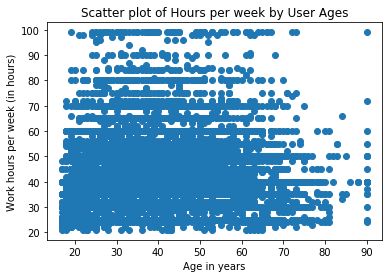

In [30]:
plt.scatter(full_time_employees['age'], full_time_employees['hours-per-week'])
plt.title('Scatter plot of Hours per week by User Ages')
plt.xlabel('Age in years')
plt.ylabel('Work hours per week (in hours)')

* Histograms - distribution of the variable
* Useful for identifying outliers, multi-modality

Text(0.5,1,'Histogram of Individual working hours')

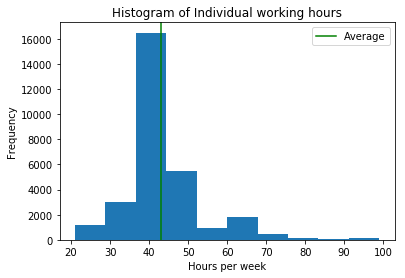

In [31]:
plt.hist(full_time_employees['hours-per-week'], bins = 10)
plt.axvline(part_time_employees['hours-per-week'].mean(), color='green', label='Average')
plt.legend()
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.title('Histogram of Individual working hours')

* Bar plot - useful for categorical data
* Let's [obtain counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) of number of users by gender and plot them

In [44]:
sex_counts = full_time_employees['sex'].value_counts()
sex_counts

 Male      20412
 Female     9221
Name: sex, dtype: int64

In [45]:
sex_counts

 Male      20412
 Female     9221
Name: sex, dtype: int64

Text(0.5,1,'Individuals by sex')

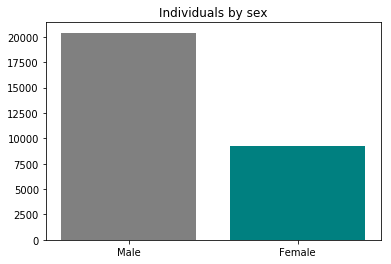

In [46]:
plt.bar(range(2), sex_counts, align='center', color=['gray', 'teal'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Individuals by sex')

# DATA CLEANING
* Wrong values
* Messy format
* Too many observations - do preliminary analysis on a subset of data
* Missing data
* Drop samples with problematic values
* Use mean, median or most common value of the feature
* Use a model to estimate the value
* Data might not be missing at random

# Dropping missing values

In [51]:
adult_data_dropped = adult_data.dropna()
adult_data_dropped.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,birth_year
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1967
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1954
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1936
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1972
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,1942


# Dropping wrong values - TBD

# Filling in missing data with summary statistics
* Impute missing data by replacing it with mean, median or the most frequent value
* Most frequent value could be a good choice for categorical data
* Imputation reduces variability within the dataset, which will impact your model's performance
* Evaluate which imputation technique gives the best perfomance
* Let's impute user's age and hours per week using the most frequent value
* We will specify the parameters for the [imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)
* Fit the imputer (find most frequent value in this case) and transform the data accordingly

In [54]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent') # specify the imputer
adult_data[['age', 'hours-per-week']] = imp.fit_transform(adult_data[['age', 'hours-per-week']]) # fit the imputer and transform the input

# Filling in missing data with k-nearest neighbors (k-NN)
* Fit a model to the data that is not missing
* Use the model to predict the values for missing data
* k-NN finds $k$ samples closest in distance to the missing point and predicts the label from these closest points
* k-NN classification: output is a category decided by majority vote of its $k$ neighbors
* k-NN regression: output is the average of the values of its $k$ nearest neighbors
* Weigh contribution of each point can be weighted by its distance from the point of interest
* Distance metric matters, number of neighbors matters
* Pick parameters that give you best performance on the final task

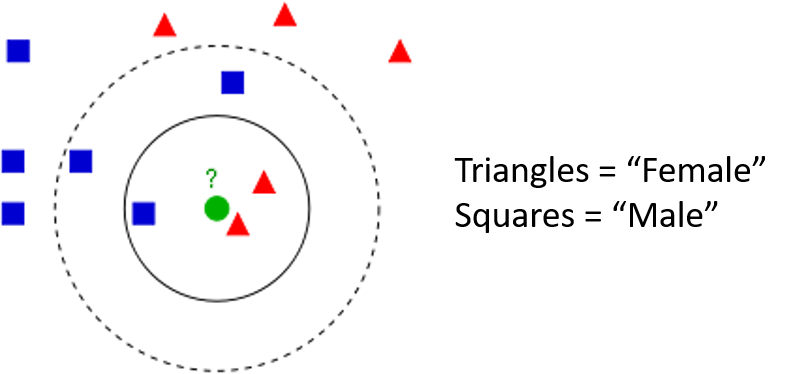

In [57]:
Image(filename='images/knn.png', width= 500, height= 300)

We will use the age column to impute missing hours-per-week values.

In [65]:
model = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
model.fit(adult_data_droppped[['age']], adult_data_droppped[['hours-per-week']])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [64]:
# TODO(need to add messy values to illustrate missing ages)
missing_ages = adult_data[pd.isnull(adult_data['age'])]['hours-per-week']
imputed_ages = model.predict(missing_ages.values.reshape(-1, 1))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
plt.hist(imputed_birthdates, bins = 20)
plt.xlabel('Imputed birth date values')
plt.ylabel('Frequency')

# FEATURE ENGINEERING
* What is the question you are trying to answer
* Creating new features that might correlate well with your prediction target
* How to transform categorical data (male vs. female) to numerical

# Example: Classify whether an individual makes more or less than 50k per year(TBD)
* What features might distinguish individuals who make less versus more than 50K per year
* People with a full time job probably make more money, since they spend more time working
* People who earn more are more likely to have some type of higher education, or be in some type of job
* On the other hand, people who make less are more likely to work less time, be in a specific job or have a lower level of education.

# One-hot encoding
* One-hot encoding is a representation of categorical variables as binary vectors
* Could use integers to denote different categories
* However categories will then be ordered, which is often not desired
* Solution: one-hot encoding

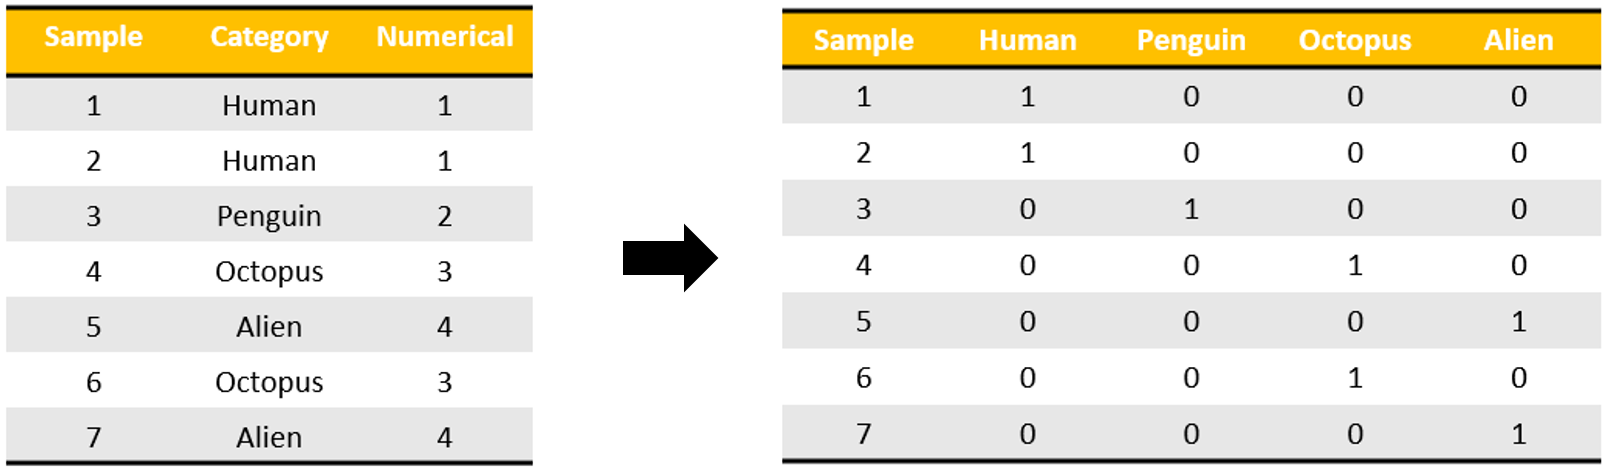

In [66]:
Image(filename='images/onehot.png', width = 900, height = 500)

Let's see how one-hot encoding works on the gender variable. First we will transform the categories "Male", "Female" and "NaN" to integers 0, 1, 2. Usually one would either impute or remove missing values, however in some cases the pattern of missing values might give you valuable insights and thus you can treat them as a separate category. The pattern of missing values for gender is probably not meaningful in this case, but for the sake of example, we will treat "NaN"s as another category.

In [67]:
adult_data['sex'] = adult_data['sex'].fillna('None') # replace nans by another name so that python doesn't recognize it as a nan
le = preprocessing.LabelEncoder() # specify paramets for encoder
adult_data['sex'] = le.fit_transform(adult_data['sex']) # fit the model and transform the sex variable
adult_data.tail() # number in paranthesis specifies the numbers of lines to show

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,birth_year
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38.0,United-States,<=50K,1967
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40.0,United-States,>50K,1954
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40.0,United-States,<=50K,1936
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20.0,United-States,<=50K,1972
32560,52.0,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,0,15024,0,40.0,United-States,>50K,1942


Now we will encode integer categories 0, and 1 as one-hot vectors.

In [71]:
enc = preprocessing.OneHotEncoder()
new_columns = enc.fit_transform(adult_data['sex'].values.reshape(-1, 1)).toarray()
adult_data[['s1', 's2']] = pd.DataFrame(new_columns, index = adult_data.index)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,birth_year,s1,s2
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40.0,United-States,<=50K,1955,0.0,1.0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13.0,United-States,<=50K,1944,0.0,1.0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40.0,United-States,<=50K,1956,0.0,1.0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40.0,United-States,<=50K,1941,0.0,1.0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40.0,Cuba,<=50K,1966,1.0,0.0


# FEATURE NORMALIZATION
* Range of values for each feature might vary dramatically
* Often in machine learning it is critical to rescale or standardize features before fitting a model
* Example: if a classifier is computing a distance between two points
    * If one of the features has a broad range of values, the distance will be dominated by this particular feature
    * Normalize each feature to be within the same range so that each feature contributes approximately proportionately to the final distance
* Some algorithms such as gradient descent converge much faster with feature normalization
* Standardization $$x_{new} = \frac{x - \bar{x}}{\sigma}$$
* Rescaling $$x_{new} = \frac{x - \min(x)}{\max(x) - \min(x)}$$

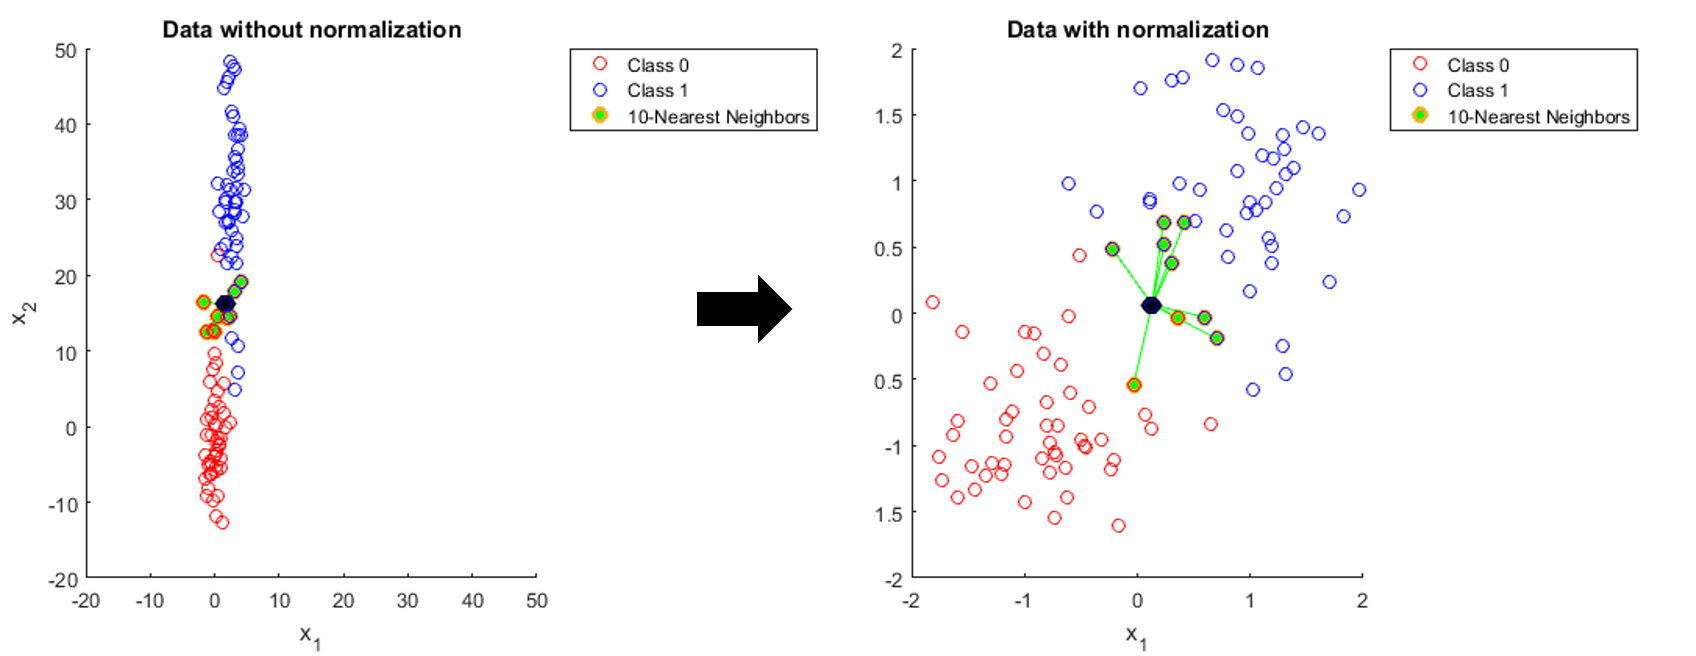

In [72]:
Image(filename='images/rescaling.png', width = 900, height = 500)

Let's standardize the duration, birth date and age variables
Let's standardize the age, fnlwgt, education-num, capital-gain, capital-loss, and hours-per-week

In [ ]:
continuous_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X = adult_data[continuous_columns]
adult_data[continuous_columns] = X - 

# EXERCISE TBD